#### Perceptron Binary Classifier
$$\boldsymbol{w} = \begin{bmatrix}
\\ w_{1}
\\ .
\\ .
\\ .
\\ w_{m}
\end{bmatrix} ,
\boldsymbol{x} = \begin{bmatrix}
\\ x_{1}
\\ .
\\ .
\\ .
\\ x_{m}
\end{bmatrix}$$


$$z = w_{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} + \cdot \cdot \cdot + w_{m}x_{m} 
  = \sum_{j=0}^{m} \mathbf{w}_{j}\mathbf{x}_{j} = \mathbf{w}^{T}\mathbf{x}$$
  
**The activation Function**

In the perceptron algorithm, the activation is **unit step function** (**Heaviside step function**)
$$\phi(z) = \left\{\begin{matrix} 
1\quad  if\ z\geq \Theta 
\\
-1\quad otherwise
\end{matrix}\right.$$

- Takes a linear combination of input values **X**
- and a corresponding weight vector **w**
- z is the net input

If the activation of a particular sample $$x^{(i)}$$ is greater than a defined threshold $$\theta$$, we predict class 1 and class -1

  ![alt text](perceptronClass.JPG "Perceptron Classification")
  
  ![alt text](perceptron.JPG "Perceptron Algorithm")



In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Implementing a perceptron learning algorithm

In [2]:
class Perceptron(object):
    """Perceptron Classifier.
        Parameters
        ================
        eta: float -> Learning rate(between 0.0 and 1.0)
        n_iter: int -> iterations over the training dataset.

        Attributes
        ============
        W : 1-d array (vector) -> Weights after fitting
        errors : list -> Number of misclassifications in every epoch
    
    """
    
    def __init__(self, eta=0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
        
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ===========
        
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors
            
        y : array-like, shape = {n_samples}
            Target values
            
        Returns
        =========
        self: object
        
        """
        
        self.w = np.zeros(1 + X.shape[1])
        self.errors = []
        
        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w[1:] += update * xi
                self.w[0] += update
                error += int(update != 0.0)
                
            self.errors.append(error)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w[1:] + self.w[0])
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#### Training a perceptron model on the Iris dataset
- Load two flower classes **Setosa** and **Versicolor** from the Iris dataset.
- Consider two features **sepal length** and **petal length**

- Use Pandas library to load the Iris dataset directly from the UCI machine learning Repo into a **DataFrame** object
- Print the last five lines via the **tail** method

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


- Extract the first 100 class labels that corresponds to the 50 Iris-Setosa and 50 Iris-Versicolor flowers
- Convert the class labels into two integer class labels 1(Versicolor) and -1(Setosa)
- Extract the first feature column (sepal length) and the third feature column (petal length)
- Assign them to a feature matrix X
- Visualize via a two dimensional scatter plot

In [6]:
y = df.iloc[0:100, 4].values

In [7]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [8]:
X = df.iloc[0:100, [0, 2]].values

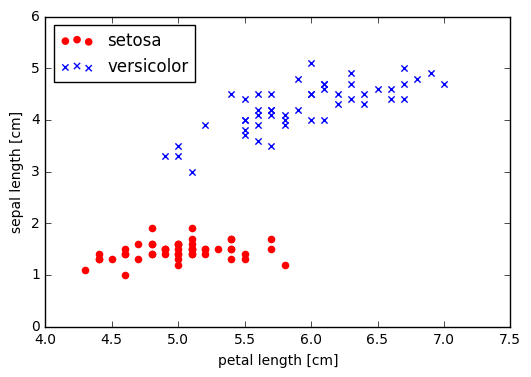

In [9]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')
plt.show()

- Train our perceptron algorithm
- plot the misclassification error for each epoch to check if the algorithm converged and found a decision boundary that separates the two Iris flower classes

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

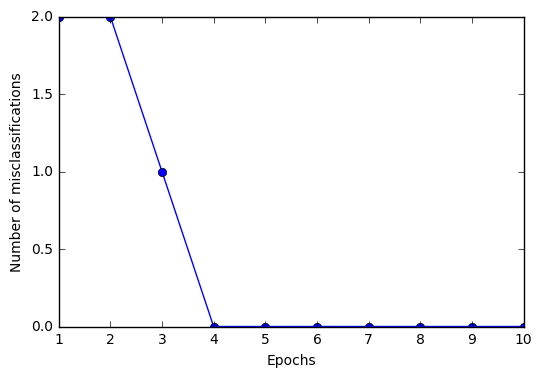

In [11]:
plt.plot(range(1, len(ppn.errors)+1), ppn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()